In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics

##### Loading data and checking basic descriptive statistics for the same .

In [2]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the given document 
# Create a python list of column names called "names"

colnames = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

data = pd.read_csv("Qualitative_Bankruptcy.data.txt", names= colnames)

In [3]:
data.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
data.tail(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B
249,P,N,N,N,A,A,B


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


###### No null values found in our data.In addition to that all the features in data are of categorical type and needed to be changed in to integer type for further analysis.

##### Checking for unique values  and special characters if any, before changing to int type or doing manual encoding for independent variable.

In [6]:
print(data['Industrial Risk'].unique())
data['Industrial Risk'].value_counts()

['P' 'N' 'A']


N    89
A    81
P    80
Name: Industrial Risk, dtype: int64

In [7]:
print(data['Management Risk'].unique())
data['Management Risk'].value_counts()

['P' 'N' 'A']


N    119
A     69
P     62
Name: Management Risk, dtype: int64

In [8]:
print(data['Financial Flexibility'].unique())
data['Financial Flexibility'].value_counts()

['A' 'P' 'N']


N    119
A     74
P     57
Name: Financial Flexibility, dtype: int64

In [9]:
print(data['Credibility'].unique())
data['Credibility'].value_counts()

['A' 'P' 'N']


N    94
P    79
A    77
Name: Credibility, dtype: int64

In [10]:
print(data['Competitiveness'].unique())
data['Competitiveness'].value_counts()

['A' 'P' 'N']


N    103
P     91
A     56
Name: Competitiveness, dtype: int64

In [11]:
print(data['Operating Risk'].unique())
data['Operating Risk'].value_counts()

['P' 'N' 'A']


N    114
P     79
A     57
Name: Operating Risk, dtype: int64

In [12]:
print(data['Class'].unique())
data['Class'].value_counts()

['NB' 'B']


NB    143
B     107
Name: Class, dtype: int64

In [13]:
data['Class'].mode()

0    NB
dtype: object

In [14]:
data.groupby(["Class"]).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


In [15]:
Ftrain = data[['Class','Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk']]

<b><h3>Encoding</h3><b>

##### Encoding using simple replace command of pandas.

In [16]:
Ftrain.replace('P',1,inplace=True)
Ftrain.replace('A',2,inplace=True)
Ftrain.replace('N',3,inplace=True)

#### ENCODING FORMAT Positive = 1 ,Average = 2, Negative = 3 

In [17]:
Ftrain.sample(5)

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
145,B,3,1,3,3,3,3
34,NB,3,1,2,2,1,3
178,B,2,1,3,2,3,3
107,NB,2,1,2,1,2,1
206,B,3,2,3,3,3,1


In [18]:
Ftrain.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Industrial Risk,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507
Management Risk,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874
Financial Flexibility,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903
Credibility,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458
Competitiveness,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383
Operating Risk,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000


#### Distribution check

##### Skew and Kurtosis

In [19]:
Ftrain.skew()

Industrial Risk         -0.067011
Management Risk         -0.444701
Financial Flexibility   -0.479134
Credibility             -0.112955
Competitiveness         -0.093906
Operating Risk          -0.275547
dtype: float64

#### The features with positive values of skew indicates data is skewed towards right in those features. The negative values of skew indicates data is skewed towards left in those features.

In [20]:
Ftrain.kurtosis()

Industrial Risk         -1.521223
Management Risk         -1.378700
Financial Flexibility   -1.290455
Credibility             -1.545520
Competitiveness         -1.711286
Operating Risk          -1.624863
dtype: float64

#### Negative values of kurtosis indicate that a distribution is flat and has thin tails.

#### Mode

In [21]:
Ftrain.mode()

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,NB,3,3,3,3,3,3


#### Mode shows that most of the  values belongs in Dependent / target variable are NB-Non-Bankruptcy.Where as all independent features have most values with -ve risk factors 

#### IQR of all attributes

In [22]:
Ftrain.quantile(0.75)-Ftrain.quantile(0.25)

Industrial Risk          2.0
Management Risk          1.0
Financial Flexibility    1.0
Credibility              2.0
Competitiveness          2.0
Operating Risk           2.0
dtype: float64

### Data Visualization

### Univariate Visualization of attributes

In [23]:
sns.set(style="ticks", color_codes=True)

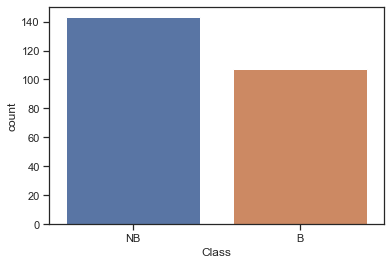

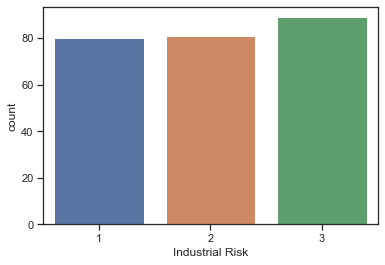

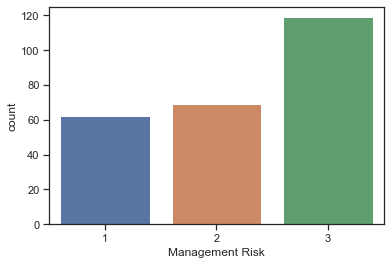

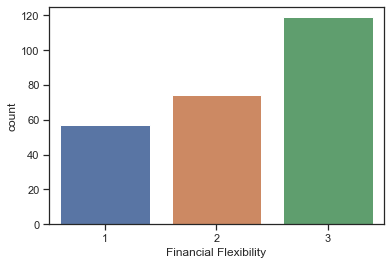

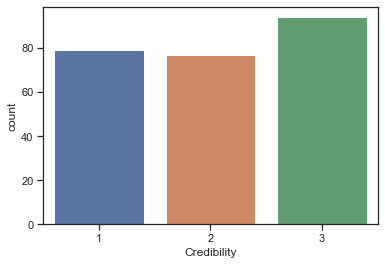

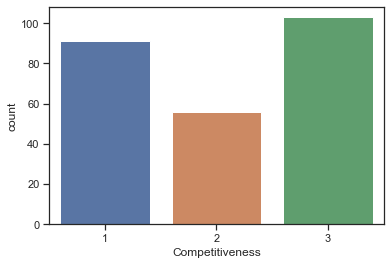

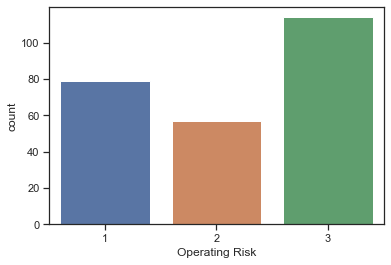

In [24]:
for i, col in enumerate(Ftrain.columns):
    plt.figure(i)
    sns.countplot(x=col, data=Ftrain)

#### It can be seen from the the plots above that data is balanced for all the attributes and can be easily interprated as all the independent features return only three set of values 1 : Postive, 2: Average  and 3 as Negative.

#### Bivariate Visualization with respect to target variable personal loan

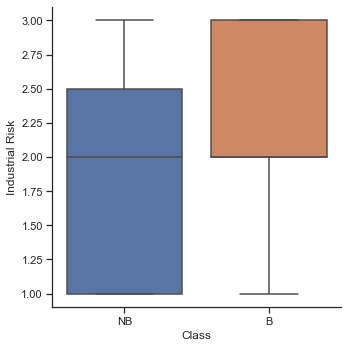

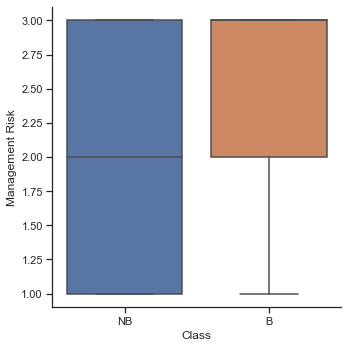

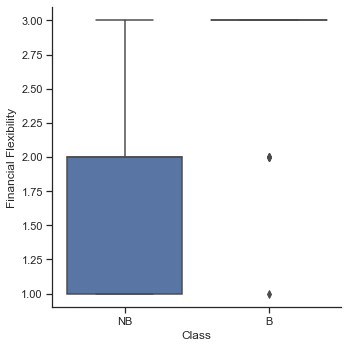

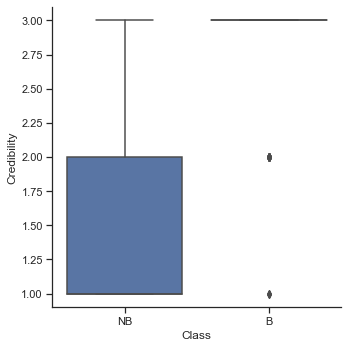

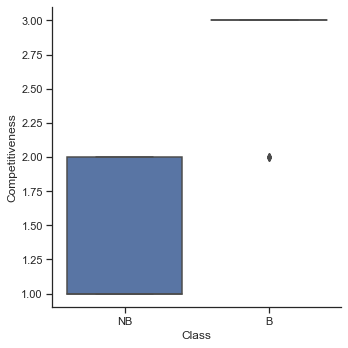

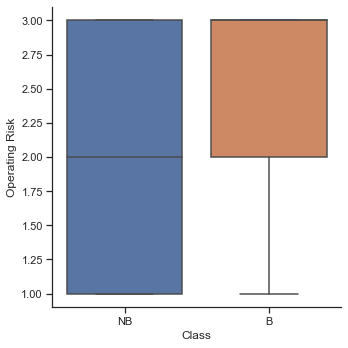

In [25]:
for i in Ftrain:
    if i != 'Class':
        sns.catplot(x='Class',y=i,kind='box',data=Ftrain)

#### From bivariate plots ,it can be seen that most of the Bankruptcy casesn in all the features  are those who have risk factors of either average values or -ve value.Only few cases with average values in Industrial risk are  NB cases.Moreover Management risk and operating risk should given less importance to check for NB and B cases as these feature have good amount of cases with both positive and -ve risk factor that belongs to both NB and B class.

#### Correlation  and Multivariate analysis

##### To get the correlation with target variable we need to encode the target variable too.. 

In [26]:
Ftrain.replace('NB',4,inplace=True)
Ftrain.replace('B',0,inplace=True)

##### ENCODING FORMAT NonBankruptcy = 4 ,Bankruptcy = 0

In [27]:
corr=Ftrain.corr()
corr

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,1.000000,-0.227823,-0.370838,-0.751020,-0.755909,-0.899452,-0.279786
Industrial Risk,-0.227823,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507
Management Risk,-0.370838,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874
Financial Flexibility,-0.751020,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903
Credibility,-0.755909,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458
Competitiveness,-0.899452,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383
Operating Risk,-0.279786,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000


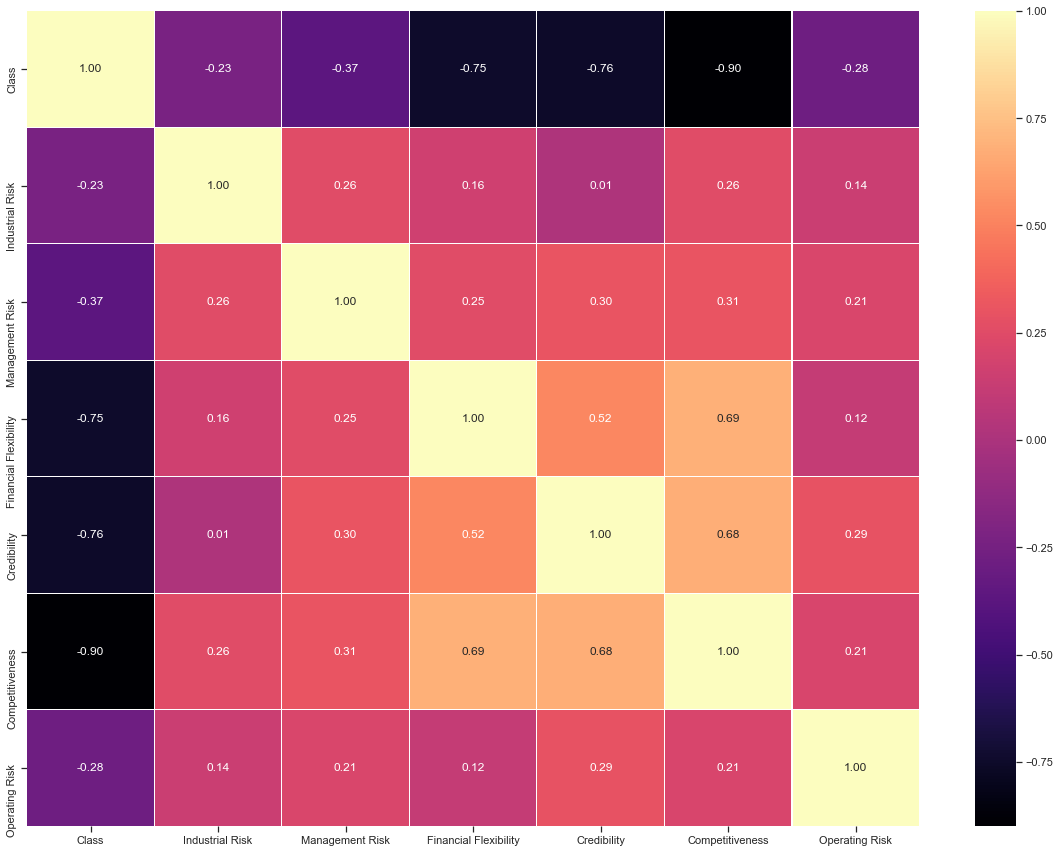

In [28]:
fig,ax = plt.subplots(figsize=(20, 15))   
sns.heatmap(corr, ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

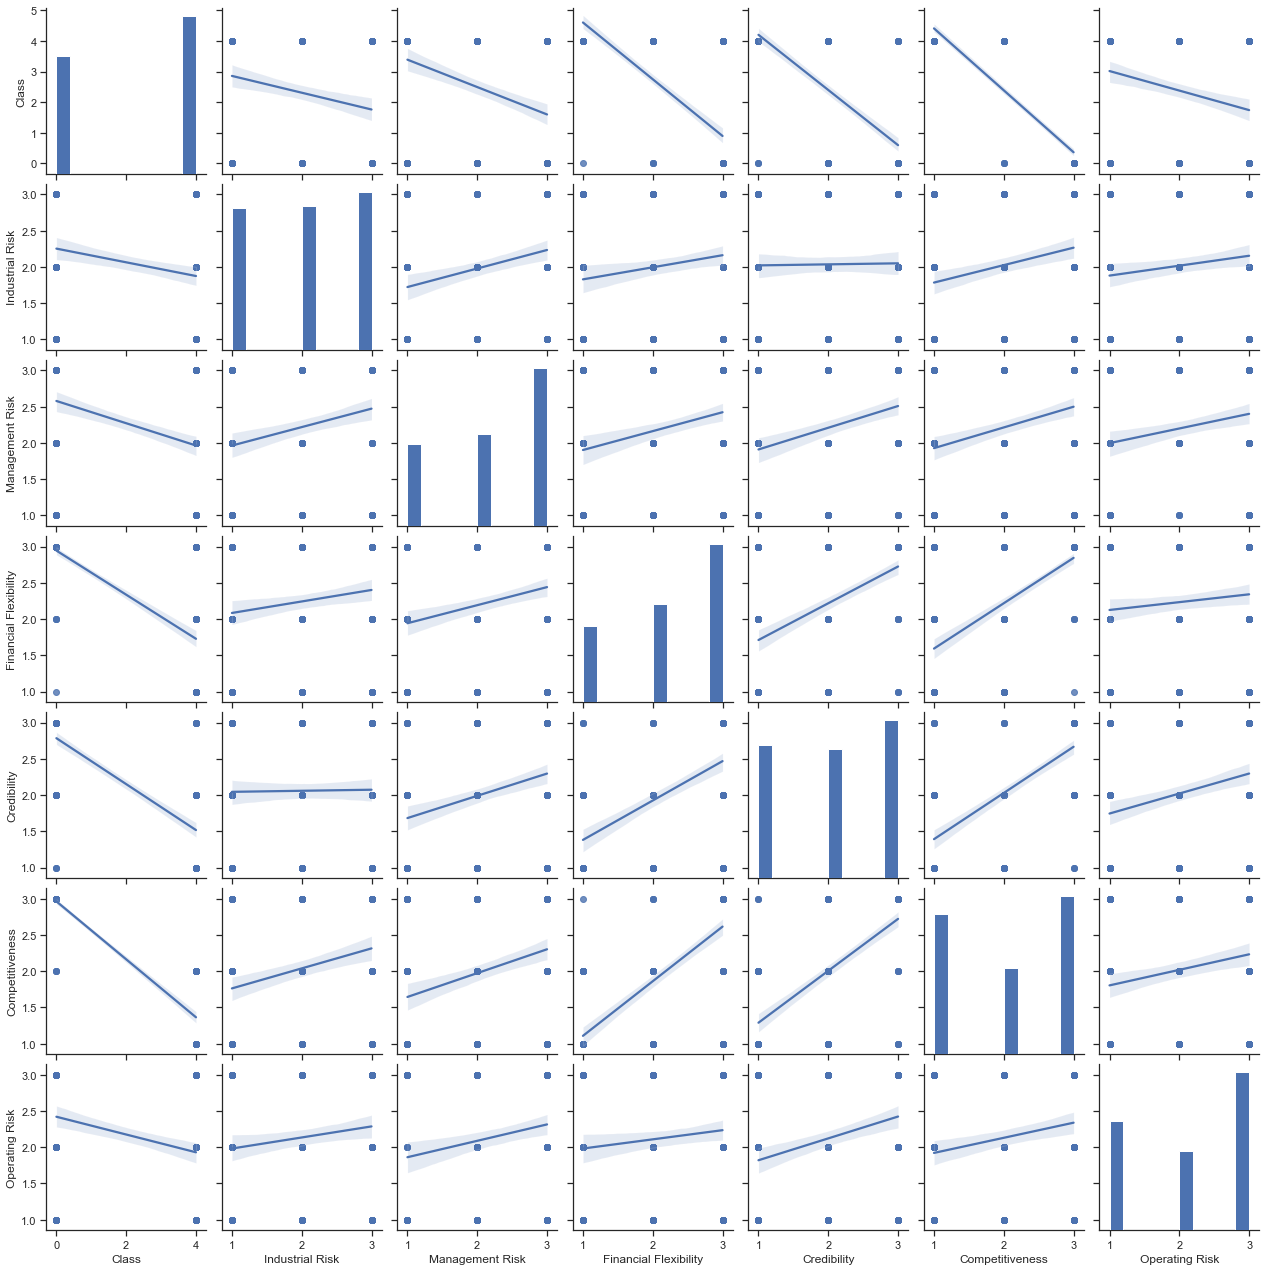

In [29]:
sns.pairplot(Ftrain, kind="reg")
plt.show()

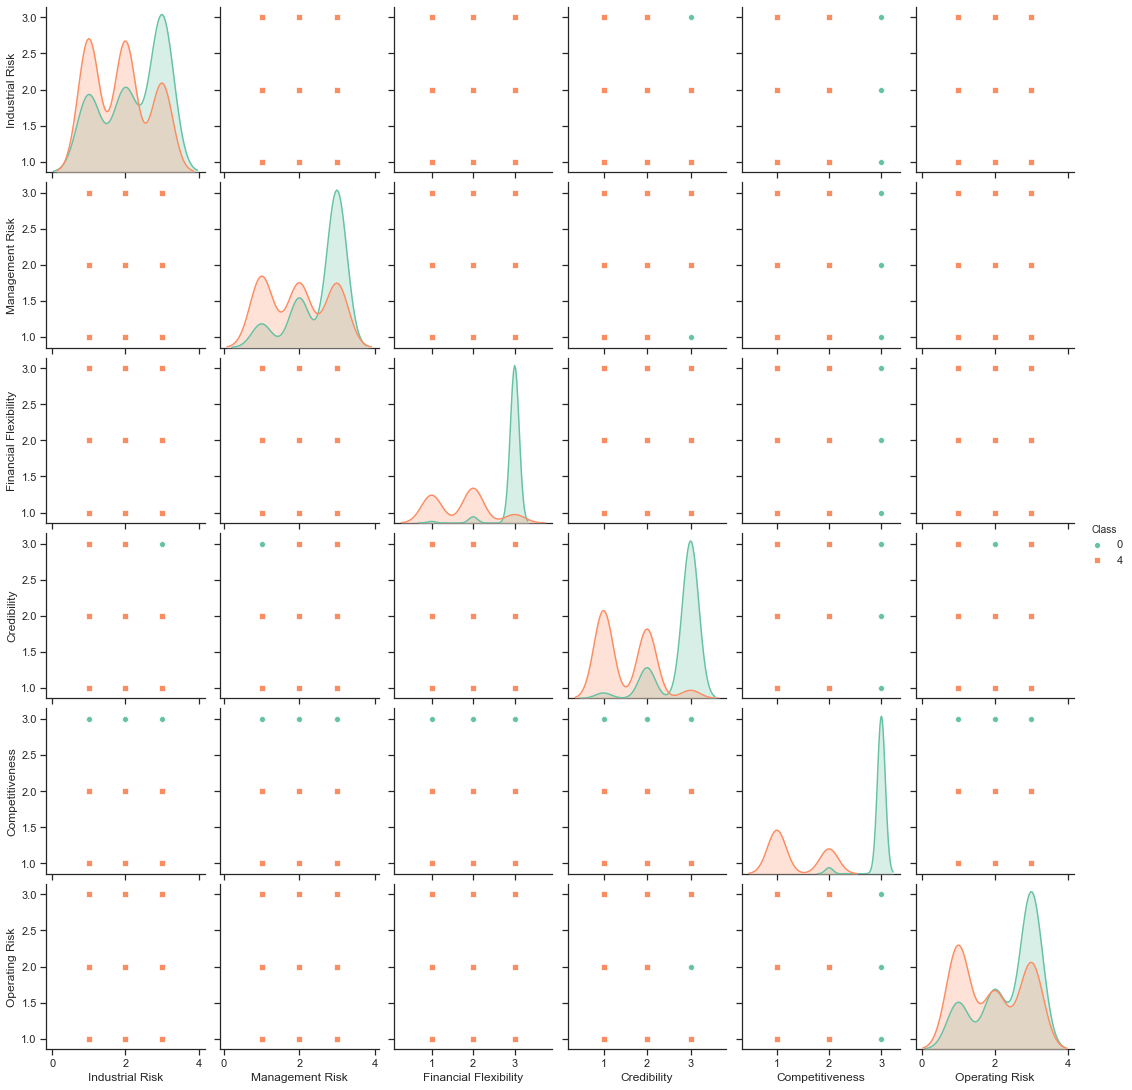

In [30]:
sns.distributions._has_statsmodels = False
sns.pairplot(Ftrain, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
plt.show()

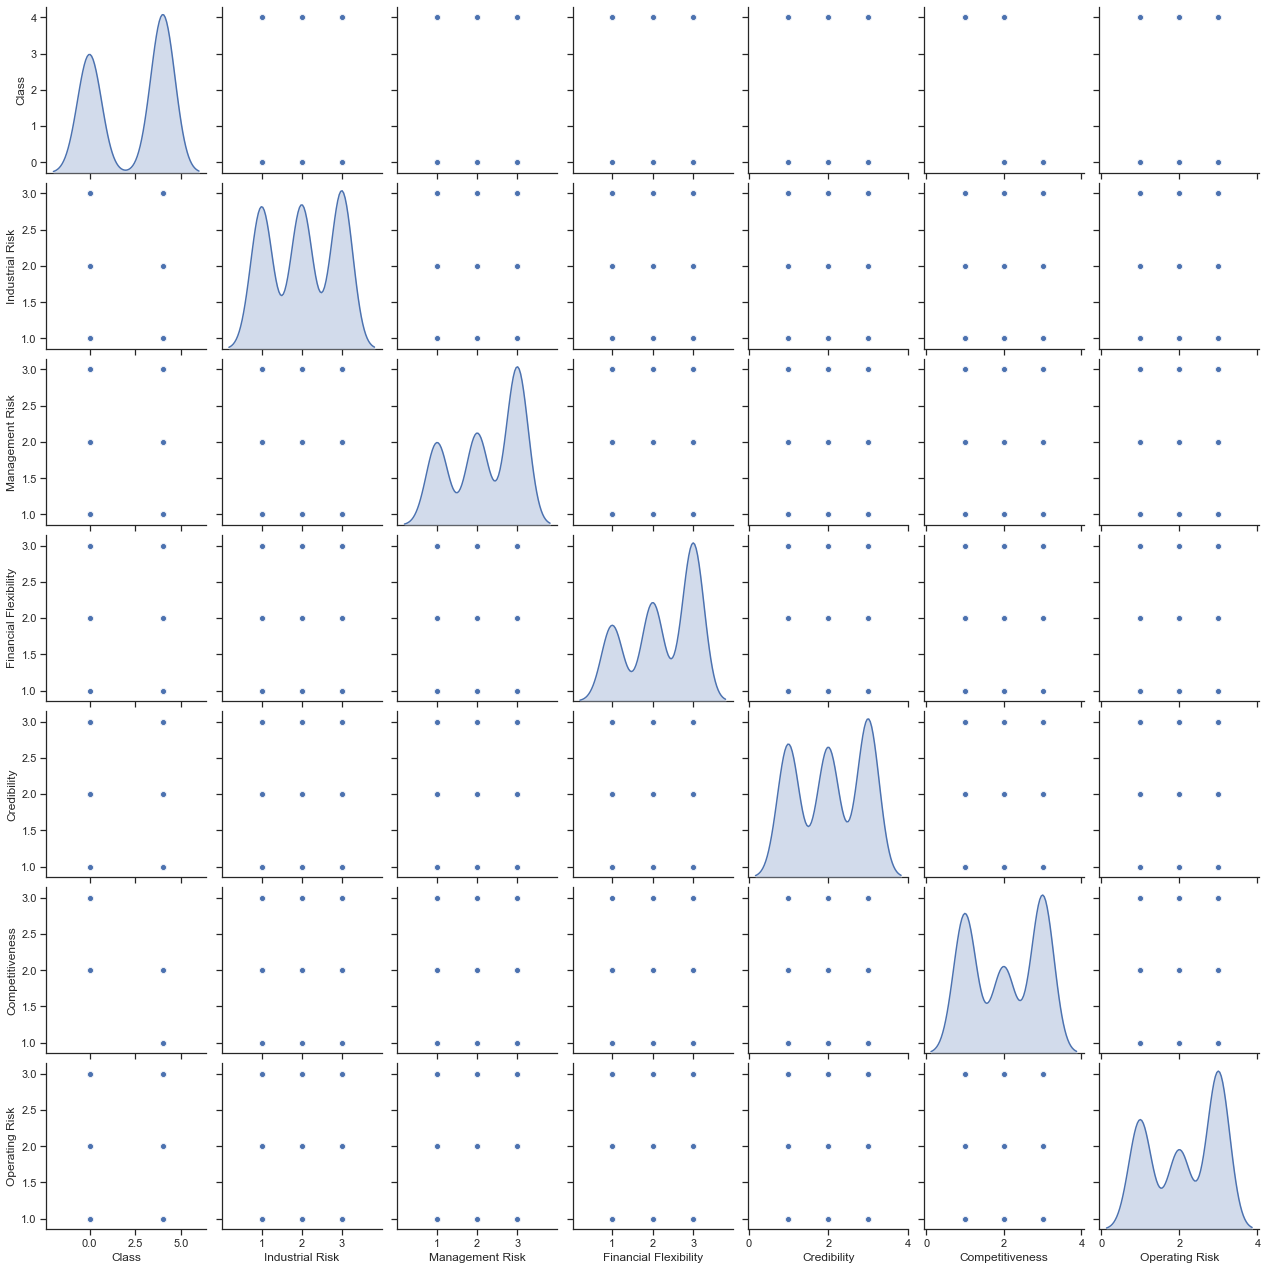

In [31]:
sns.pairplot(Ftrain,diag_kind ='kde')

##### It can be seen from pair plots that all the features are properly balanced and three different values are seperating the element of each column properly.All the features are strong features for ananlysis.

#### It can be seen that Financial Flexibility,Credibility and Competitiveness have high -ve correlation with target variable and Industrial risk,management risk and operating risk have comparitively lesser correlation with target variable but all of them does not belong to range of -0.1 to 0.1 and are strong features for analysis.

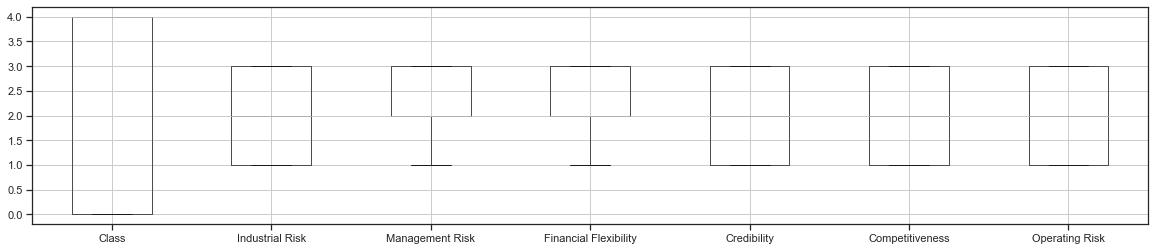

In [32]:
Ftrain.boxplot(figsize=(20,4))

##### Seperating Target Variable and Independent Variable for further analysis

In [33]:
y= Ftrain['Class']
X = Ftrain.drop('Class',axis=1)

In [34]:
X.sample(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
121,3,3,1,2,2,3
80,1,2,2,2,1,2
7,1,1,1,2,2,1
229,2,2,3,3,3,3
215,3,2,1,2,3,1


In [35]:
y.sample(5)

187    0
200    0
134    4
47     4
133    4
Name: Class, dtype: int64

#### Scaling Data before K means clustering..

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaled_df= Ftrain.drop(['Class'],axis=1)

In [38]:
scaled_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1,1,2,2,2,1
1,3,3,2,2,2,3
2,2,2,2,2,2,2
3,1,1,1,1,1,1
4,3,3,1,1,1,3


In [39]:
sc = StandardScaler()
scaled_df = sc.fit_transform(scaled_df)

In [40]:
scaled_df

array([[-1.26125562, -1.49798878, -0.30939726, -0.0723154 , -0.05457026,
        -1.31425748],
       [ 1.17360079,  0.94173236, -0.30939726, -0.0723154 , -0.05457026,
         0.9914574 ],
       [-0.04382742, -0.27812821, -0.30939726, -0.0723154 , -0.05457026,
        -0.16140004],
       ...,
       [-0.04382742,  0.94173236,  0.93817234,  1.13294134,  1.08231025,
         0.9914574 ],
       [ 1.17360079,  0.94173236,  0.93817234,  1.13294134,  1.08231025,
         0.9914574 ],
       [-1.26125562,  0.94173236,  0.93817234,  1.13294134, -0.05457026,
        -0.16140004]])

### Clustering.

In [41]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

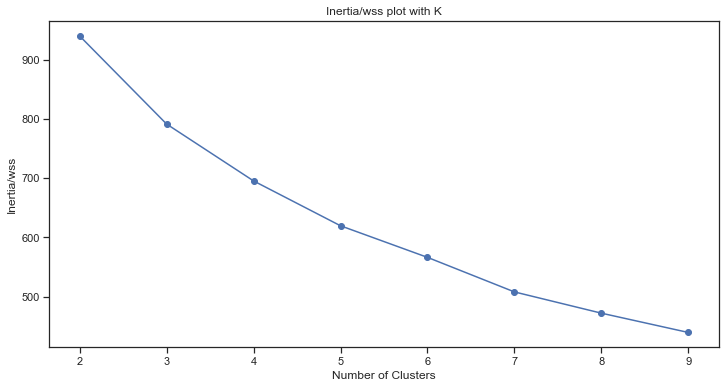

Silhouette-Score for 2 Clusters:  0.34154855745511764
Silhouette-Score for 3 Clusters:  0.29165574599574096
Silhouette-Score for 4 Clusters:  0.24342845910291014
Silhouette-Score for 5 Clusters:  0.24968456123945862
Silhouette-Score for 6 Clusters:  0.2540025889909315
Silhouette-Score for 7 Clusters:  0.27350350948189933
Silhouette-Score for 8 Clusters:  0.2839867149114604
Silhouette-Score for 9 Clusters:  0.2823718220823925
Silhouette-Score for 10 Clusters:  0.2867043896858667


In [42]:
def inertia_plot(clust, X, start = 2, stop = 10):
    inertia = []
    for x in range(start,stop):
        k_means = clust(n_clusters = x)
        labels = k_means.fit_predict(X)
        inertia.append(k_means.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia/wss')
    plt.title('Inertia/wss plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()
inertia_plot(KMeans,scaled_df)
for x in range(2, 11):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(scaled_df)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(scaled_df, label))

##### Using the elbow method, we pick a good number of clusters to be 4 as values for silhouette score is converging with small margin after that.

In [43]:

def silh_samp_cluster(clust,  X, start=2, stop=21, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        k_means = clust(n_clusters = x)
        y_k_means = k_means.fit_predict(X)
        cluster_labels = np.unique(y_k_means)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_k_means, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_k_means == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

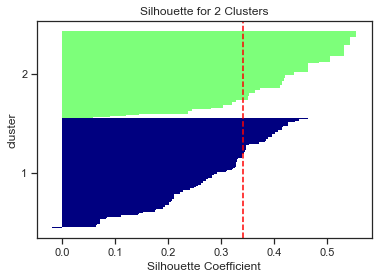

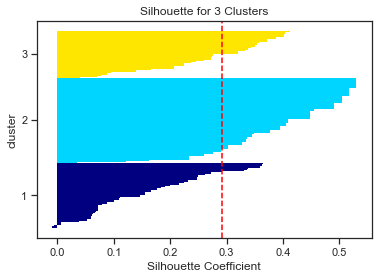

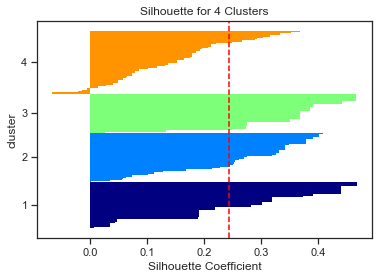

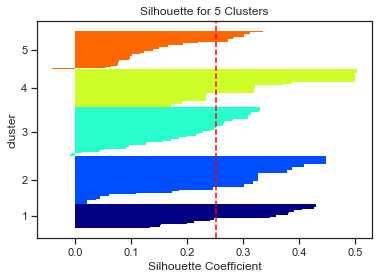

In [44]:
silh_samp_cluster(KMeans, scaled_df, stop=6)

##### The silhouette plot shows that the n_clusters value of 2, 3 and 5 are a bad pick for the given data due to more diverse fluctuations in the size of the silhouette plots. However when comparing between thickness of plots for 2 and 4 clusters , all the plots are more or less of similar thickness and hence are of similar sizes with 4 cluster having more uniformity in plots .All these reasons make 4 clusters a better choice.

In [45]:
kmeans4= KMeans(n_clusters=4,random_state=90)
kmeans4 = kmeans4.fit(scaled_df)
labels4 = kmeans4.predict(scaled_df)
centroids4 = kmeans4.cluster_centers_
print("Centroid values",centroids4)

Centroid values [[-0.6084318  -0.82618151 -0.41788158 -0.75354748 -0.66420185 -1.01351206]
 [ 1.17360079  0.61330836  0.84220545  0.71573708  1.08231025  0.12681432]
 [-0.6628587   0.30078867  0.8747366   0.98994477  0.87034948  0.50295848]
 [ 0.28661738  0.10525654 -0.95100449 -0.62328991 -0.88286893  0.48090625]]


##### Silhouette score

In [46]:
silhouette_avg = silhouette_score(scaled_df,labels4)
print("For n_clusters = 4","The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.24451606431755246


##### Within Cluster Sum of Squares

In [47]:
wcss4 = kmeans4.inertia_
wcss4

696.7355877588265

### Cluster Profiling :  creating a new column in the data and populate it with the cluster labels.


In [48]:
Ftrain['labels'] = pd.DataFrame(kmeans4.labels_ , columns = list(['labels']))

In [49]:
pd.value_counts(Ftrain['labels']).sort_index()

0    69
1    52
2    59
3    70
Name: labels, dtype: int64

In [50]:
clust_profile=Ftrain
clust_profile=clust_profile.groupby('labels').median()
clust_profile['freq']=pd.value_counts(Ftrain['labels']).sort_index()
clust_profile

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,freq
labels,,,,,,,,
0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,69
1,0.0,3.0,3.0,3.0,3.0,3.0,2.5,52
2,0.0,1.0,3.0,3.0,3.0,3.0,3.0,59
3,4.0,2.0,2.0,1.0,1.0,1.0,3.0,70


In [51]:
Ftrain.head()

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,labels
0,4,1,1,2,2,2,1,0
1,4,3,3,2,2,2,3,3
2,4,2,2,2,2,2,2,3
3,4,1,1,1,1,1,1,0
4,4,3,3,1,1,1,3,3


In [52]:
Ftrain.sample(5)

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,labels
67,4,1,2,3,2,1,3,2
89,4,2,2,2,1,1,2,3
99,4,1,2,1,2,1,1,0
105,4,2,1,2,1,2,1,0
161,0,2,3,3,3,3,3,2


In [53]:
from sklearn.model_selection import train_test_split

y= Ftrain['Class']
X = Ftrain.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=4)

In [54]:
X_train.shape

(175, 7)

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


In [56]:
#The model giving accuracy 0.98 on the training set and 1 on the test set.

#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately
#on the same scale and than see the performance

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [58]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


SVM is giving 100% accuracy for the train and test data.

In [59]:
svc_predict=svc.predict(X_test_scaled)

In [60]:
#Confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test, svc_predict))
print(metrics.classification_report(y_test, svc_predict))


[[31  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        44

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



#### it shud be noted that O represents the Bankruptcy class where as 4 represents the Non-Bankruptcy class.

# REMARKS : Cofusion matrix shows that no error has been detected while using SVC classifier after clustering for this classification problem.Neither False positives nor False negatives have been returned by SVC model when 75 elements are taken as test data.